Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ x ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ x ] Engineer at least two new features. (See below for explanation & ideas.)
- [ x ] Fit a linear regression model with at least two features.
- [ x ] Get the model's coefficients and intercept.
- [ x ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [41]:
# starting my code here:
# beginining by visualizing the dataframe 

df.sample(5)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
17317,1.0,1,2016-06-22 05:05:20,Perched above Tear Drop Park is this lovely on...,River Terrace,40.7155,-74.0161,4650,2 River Terrace,low,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8297,1.0,1,2016-04-17 01:24:35,"Huge, renovated one bedroom in Greenwich Villa...",East 10th Street,40.7327,-73.9931,4175,25 East 10th Street,low,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46268,1.0,2,2016-04-09 04:14:17,This spacious apartment plus study features hi...,Wall Street,40.7058,-74.0086,4499,63 Wall Street,medium,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
46490,0.0,0,2016-04-16 02:49:29,Apartment Description:Studio with renovated ki...,24 Fifth Avenue,40.7332,-73.9960,3100,24 Fifth Avenue,low,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
40868,2.0,2,2016-06-22 05:57:02,King sized convertible 2 bedroom apartment wit...,Broad Street,40.7061,-74.0111,6000,25 Broad Street,low,1,0,1,0,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0


## part 1: 
- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.

### cleaning up the datetime before filtering

In [42]:
# look at the type of object created is: 
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

In [0]:
# converts the object file to a datatime file. 
df['created'] = pd.to_datetime(df['created'])

In [44]:
# and look at it now
df.dtypes

bathrooms                      float64
bedrooms                         int64
created                 datetime64[ns]
description                     object
display_address                 object
latitude                       float64
longitude                      float64
price                            int64
street_address                  object
interest_level                  object
elevator                         int64
cats_allowed                     int64
hardwood_floors                  int64
dogs_allowed                     int64
doorman                          int64
dishwasher                       int64
no_fee                           int64
laundry_in_building              int64
fitness_center                   int64
pre-war                          int64
laundry_in_unit                  int64
roof_deck                        int64
outdoor_space                    int64
dining_room                      int64
high_speed_internet              int64
balcony                  

### filtering

In [0]:
df = df.set_index(df['created'])
df = df.sort_index()

In [46]:
train_2016 = df['2016-04-01':'2016-05-30']
test_2016 = df['2016-06-01':'2016-06-30']
train_2016.shape, test_2016.shape

((31839, 34), (16973, 34))

In [47]:
train_2016.sample(6)

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-25 05:28:31,1.0,1,2016-04-25 05:28:31,Renovated large Studio located on 7th Avenue ...,7th Avenue,40.7525,-73.9897,2450,488 7th Avenue,low,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-02 02:53:30,2.0,2,2016-04-02 02:53:30,RenvoatedLife at 200 Water Street promises stu...,200 Water Street,40.7073,-74.0046,5675,200 Water Street,low,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2016-04-24 03:10:28,1.0,2,2016-04-24 03:10:28,"Modern renovations throughout, with flowing sp...",Beautiful Spacious Renovated Modern Kitchen & ...,40.8455,-73.9415,1900,710 W 173rd St.,medium,1,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-03 03:06:23,2.0,2,2016-04-03 03:06:23,This newly renovated apartment home features E...,Broadway,40.7074,-74.0122,5800,71 Broadway,low,1,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2016-05-05 06:43:26,1.0,3,2016-05-05 06:43:26,LOW FEE!! ALL UTILITIES INCLUDED!!!!! luxury H...,Third Avenue,40.7823,-73.9510,3695,1641 Third Avenue,medium,1,0,1,0,1,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2016-04-12 05:43:06,1.0,0,2016-04-12 05:43:06,"Already built out, and ready to move in Office...",W 37th St.,40.7547,-73.9939,9391,336 W 37th St.,low,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## part 2 

- [ ] Engineer at least two new features. (See below for explanation & ideas.)

0 features first


In [48]:
bed_bath = train_2016[['bedrooms'] + ['bathrooms']].mean()
print(bed_bath)

bedrooms     1.528252
bathrooms    1.203760
dtype: float64


In [0]:
# Arrange y target vectors
target = 'bedrooms'
y_train = train_2016[target]
y_test = test_2016[target]

In [50]:
# Get mean baseline
print('Mean Baseline (using 0 features)')
guess = y_train.mean()
guess

Mean Baseline (using 0 features)


1.5282515154370426

In [51]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (March to April): {mae:.2f} percentage points')

Train Error (March to April): 0.93 percentage points


In [52]:
# Test Error
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (March to Aprils): {mae:.2f} percentage points')

Test Error (March to Aprils): 0.93 percentage points


In [53]:
import pandas as pd
import plotly.express as px

px.scatter_3d(
    train_2016,
    x='elevator', 
    y='bathrooms', 
    z='bedrooms', 
    text='price', 
    title='Rent Prices in NYC'
)

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
# Re-arrange X features matrices
features = ['bedrooms', 
            'bathrooms']
print(f'Linear Regression, dependent on: {features}')

X_train = train_2016[features]
X_test = test_2016[features]

Linear Regression, dependent on: ['bedrooms', 'bathrooms']


In [56]:
X_train.shape, X_test.shape


((31839, 2), (16973, 2))

In [57]:
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_pred_train = model.predict(X_train)
y_pred_train

array([ 1.00000000e+00, -2.63737289e-15,  3.00000000e+00, ...,
       -2.63737289e-15,  2.00000000e+00, -2.63737289e-15])

In [59]:
y_pred_train.shape


(31839,)

In [60]:
mean_absolute_error(y_train, y_pred_train)


1.6484515937136516e-15

In [0]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [62]:
regression_3d(
    train_2016,
    x='cats_allowed', 
    y='pre-war', 
    z='bedrooms', 
    text='price', 
    title='US Presidential Elections, 1952-2004'
)

In [64]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y = {beta0:.2f} + {beta1:.2f}*x1 + {beta2:.2f}*x2')

y = -0.00 + 1.00*x1 + 0.00*x2


In [65]:
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept -2.6645352591003757e-15
bedrooms     1.000000e+00
bathrooms    2.716237e-17


In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 1.221091672535707
Root Mean Squared Error: 1.1050301681563752
Mean Absolute Error: 0.9317636764412042
R^2: 0.0


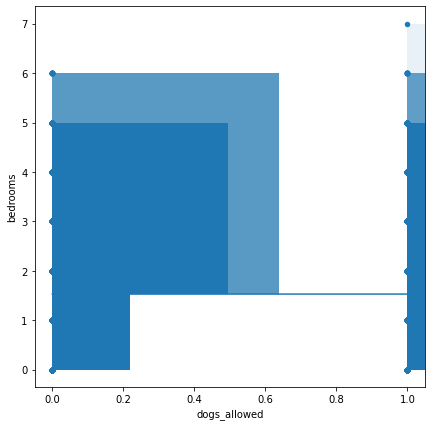

In [67]:
feature = 'dogs_allowed'
squared_errors(train_2016, feature, target, m=0, b=y_train.mean())

In [63]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-04-01 22:12:41,1.0,1,2016-04-01 22:12:41,X-LARGE Flex 1BR Loft! ~~ PRIME Greenwich Vill...,Astor Place,40.7302,-73.9924,3195,1 Astor Place,high,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-01 22:56:00,1.0,0,2016-04-01 22:56:00,"This Enormous Studio Features: Harwood Floors,...",East 54th Street,40.7576,-73.9677,2000,230 East 54th Street,medium,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-01 22:57:15,2.0,3,2016-04-01 22:57:15,--- East 31st St & Lexington Avenue --- This S...,East 31st St & Lexington Avenue,40.7388,-73.9851,5850,105 Lexington Avenue,high,1,1,0,1,1,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2016-04-01 23:26:07,1.0,1,2016-04-01 23:26:07,Reduced Fee!! Priced To Rent!\rLarge Newly Upd...,West End Ave,40.7939,-73.9738,2745,700 West End Ave,medium,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2016-04-02 00:48:13,1.0,1,2016-04-02 00:48:13,Phenomenal deal of the century!! This spacious...,E 88th street,40.7784,-73.9491,2400,401 E 88th street,medium,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
